In [1]:
import os
import re

import pandas as pd
import anndata
import scanpy as sc
from scipy.sparse import csr_matrix
import numpy as np
from collections import Counter

In [2]:
import pollock.utils as utils

In [3]:
fps = sorted(utils.listfiles('/data/pollock/benchmarking/pollock_datasets/scRNAseq/', regex=r'_val.h5ad'))
fps

['/data/pollock/benchmarking/pollock_datasets/scRNAseq/brca_val.h5ad',
 '/data/pollock/benchmarking/pollock_datasets/scRNAseq/cesc_val.h5ad',
 '/data/pollock/benchmarking/pollock_datasets/scRNAseq/hnscc_val.h5ad',
 '/data/pollock/benchmarking/pollock_datasets/scRNAseq/melanoma_val.h5ad',
 '/data/pollock/benchmarking/pollock_datasets/scRNAseq/myeloma_val.h5ad',
 '/data/pollock/benchmarking/pollock_datasets/scRNAseq/pdac_val.h5ad']

In [18]:
def induce_dropout(adata, pct):
    is_sparse = True if 'sparse' in str(type(adata.X)).lower() else False
    if is_sparse:
        adata.X = adata.X.toarray()
        
    mask = np.random.rand(*adata.shape) < pct
    
    adata.X[mask] = 0.
    
    if is_sparse:
        adata.X = csr_matrix(adata.X)
    
    return adata

In [22]:
output_dir = '/data/pollock/benchmarking/dropout_datasets'

In [25]:
rates = [0., .2, .4, .6, .8, .9, .95]
for fp in fps:
    disease = fp.split('/')[-1].replace('_val.h5ad', '')
    for rate in rates:
        a = sc.read_h5ad(fp)
        a = induce_dropout(a, rate)
        a.write_h5ad(os.path.join(output_dir, f'{disease}_{rate:.2f}.h5ad'))
        

In [9]:
a = sc.read_h5ad(fps[0])
a

AnnData object with n_obs × n_vars = 5748 × 27131
    obs: 'cell_type', 'barcode', 'sample'

In [11]:
np.count_nonzero(a.X.toarray()) / (a.shape[0] * a.shape[1])

0.0517467096355893

In [12]:
np.count_nonzero(a.X.toarray(), axis=1) / a.shape[1]

array([0.08197265, 0.09627364, 0.03877483, ..., 0.08009288, 0.01809738,
       0.02978143])

In [13]:
import seaborn as sns

/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

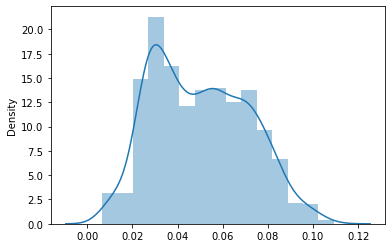

In [14]:
sns.distplot((np.count_nonzero(a.X.toarray(), axis=1) / a.shape[1])[:1000])

In [19]:
b = induce_dropout(a, .8)

/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

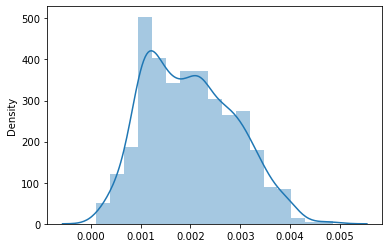

In [21]:
sns.distplot((np.count_nonzero(b.X, axis=1) / b.shape[1])[:1000])

In [29]:
adata = sc.read_h5ad('/home/estorrs/data/single_cell_classification/tumor/BR/scRNA/brca_with_immune.h5ad')
adata

AnnData object with n_obs × n_vars = 98564 × 27131
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'sample', 'tissue_type', 'cell_type', 'cell_type_specific', 'Piece_ID', 'Clinical_Subtype', 'doublet_score', 'predicted_doublet', 'Composite_PAM50', 'active.ident'
    obsm: 'X_umap'
    layers: 'counts'

In [30]:
a.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters,sample,tissue_type,cell_type,cell_type_specific,Piece_ID,Clinical_Subtype,doublet_score,predicted_doublet,Composite_PAM50,active.ident
_HT062B1_S1PA_AAACCCACACAAATGA-1,TWCE-HT062B1-S1PAA1A1Z1B1,4837.0,1378,0.043829,4154.0,1378,2,2,HT062B1,tumor,CD8_T,CD8_CTL,HT062B1_S1PA,TNBC,0.036018,0,Her2,CD8_CTL
_HT062B1_S1PA_AAACCCAGTGCTCCGA-1,TWCE-HT062B1-S1PAA1A1Z1B1,6400.0,2369,0.061562,4515.0,2344,4,4,HT062B1,tumor,Endothelial,Endothelial,HT062B1_S1PA,TNBC,0.105210,0,Her2,Endothelial
_HT062B1_S1PA_AAACCCATCGGAATTC-1,TWCE-HT062B1-S1PAA1A1Z1B1,10255.0,2945,0.042321,4558.0,1978,10,10,HT062B1,tumor,CAF,mCAF,HT062B1_S1PA,TNBC,0.051376,0,Her2,mCAF
_HT062B1_S1PA_AAACGAACAGCTAACT-1,TWCE-HT062B1-S1PAA1A1Z1B1,1433.0,751,0.073273,3072.0,801,13,13,HT062B1,tumor,Tumor,Tumor,HT062B1_S1PA,TNBC,0.013000,0,Her2,Tumor
_HT062B1_S1PA_AAACGAAGTAGGGAGG-1,TWCE-HT062B1-S1PAA1A1Z1B1,2256.0,934,0.050089,3281.0,934,2,2,HT062B1,tumor,CD8_T,CD8_T preexhausted GZMK+,HT062B1_S1PA,TNBC,0.027729,0,Her2,CD8_T preexhausted GZMK+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_HT171B1_BC2_TTTGTTGCACCAGACC-1,TWCE-HT171B1-BC2,4717.0,1660,0.063600,4178.0,1660,8,8,HT171B1,tumor,CD4_T,CD4_T exhausted,HT171B1_S1H8,TNBC,0.104260,0,Basal,CD4_T exhausted
_HT171B1_BC2_TTTGTTGCACGTACTA-1,TWCE-HT171B1-BC2,4627.0,1441,0.014048,4117.0,1441,1,1,HT171B1,tumor,Tumor,Tumor,HT171B1_S1H8,TNBC,0.034114,0,Basal,Tumor
_HT171B1_BC2_TTTGTTGTCCCAAGCG-1,TWCE-HT171B1-BC2,3236.0,1392,0.051916,3482.0,1392,8,8,HT171B1,tumor,CD8_T,CD8_T exhausted,HT171B1_S1H8,TNBC,0.027347,0,Basal,CD8_T exhausted
_HT171B1_BC2_TTTGTTGTCCTCACCA-1,TWCE-HT171B1-BC2,13163.0,4124,0.036162,3946.0,1808,7,7,HT171B1,tumor,Mono_Macro,Mono_Macro,HT171B1_S1H8,TNBC,0.233279,0,Basal,Mono_Macro


In [31]:
cell_type_map = {
    'B': 'B cell',
    'CD4_T': 'CD4 T cell',
    'CD4_T activated': 'CD4 T cell - activated',
    'CD4_T exhausted': 'CD4 T cell - exhausted',
    'CD8_CTL': 'CD8 T cell - CTL',
    'CD8_T exhausted': 'CD8 T cell - exhausted',
    'CD8_T preexhausted GZMK+': 'CD8 T cell - preexhausted',
    'CD8_T proliferating': 'CD8 T cell - proliferating',
    'cDC1': 'cDC1',
    'cDC2': 'cDC2',
    'Mast': 'Mast',
    'Mono_Macro': 'Monocyte/Macrophage',
    'NK cells': 'NK',
    'NKT_cells': 'NKT',
    'pDC': 'pDC',
    'Plasma': 'Plasma',
    'Treg': 'Treg',
}
immune = adata[[True if c in cell_type_map else False for c in adata.obs['cell_type_specific']]]
immune.obs['cell_type'] = [cell_type_map[c] for c in immune.obs['cell_type_specific']]
adata.obs['renamed_cell_type']= [cell_type_map.get(c, c) for c in adata.obs['cell_type_specific']]

Trying to set attribute `.obs` of view, copying.


In [32]:
counts_adata = immune.copy()
counts_adata.X = counts_adata.layers['counts']
counts_adata

AnnData object with n_obs × n_vars = 49063 × 27131
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'sample', 'tissue_type', 'cell_type', 'cell_type_specific', 'Piece_ID', 'Clinical_Subtype', 'doublet_score', 'predicted_doublet', 'Composite_PAM50', 'active.ident'
    obsm: 'X_umap'
    layers: 'counts'

In [35]:
Counter(counts_adata.obs['cell_type']).most_common()

[('Monocyte/Macrophage', 8049),
 ('CD4 T cell', 7104),
 ('Plasma', 7092),
 ('CD8 T cell - preexhausted', 4190),
 ('CD8 T cell - exhausted', 4099),
 ('NKT', 3328),
 ('B cell', 2972),
 ('CD4 T cell - activated', 2745),
 ('Treg', 2721),
 ('cDC2', 2079),
 ('CD4 T cell - exhausted', 1515),
 ('Mast', 755),
 ('CD8 T cell - CTL', 705),
 ('CD8 T cell - proliferating', 529),
 ('NK', 527),
 ('pDC', 385),
 ('cDC1', 268)]

In [37]:
a = counts_adata.copy()

In [42]:
a.obs = a.obs[['cell_type', 'Piece_ID']]
print(a.shape)
a.obs['barcode'] = [re.sub(r'^.*[_-]([ACTG]+.1)$', r'\1', x) for x in a.obs.index.to_list()]
a.obs.columns = ['cell_type', 'sample', 'barcode']
a.obs.index = [f'{s}_{b}' for s, b in zip(a.obs['sample'], a.obs['barcode'])] 
a.obs

(49063, 27131)


,cell_type,sample,barcode
HT062B1_S1PA_AAACCCACACAAATGA-1,CD8 T cell - CTL,HT062B1_S1PA,AAACCCACACAAATGA-1
HT062B1_S1PA_AAACGAAGTAGGGAGG-1,CD8 T cell - preexhausted,HT062B1_S1PA,AAACGAAGTAGGGAGG-1
HT062B1_S1PA_AAACGAATCGTGGCGT-1,CD8 T cell - CTL,HT062B1_S1PA,AAACGAATCGTGGCGT-1
HT062B1_S1PA_AAACGCTGTGGAATGC-1,CD8 T cell - CTL,HT062B1_S1PA,AAACGCTGTGGAATGC-1
HT062B1_S1PA_AAACGCTGTGGGAGAG-1,CD8 T cell - CTL,HT062B1_S1PA,AAACGCTGTGGGAGAG-1
...,...,...,...
HT171B1_S1H8_TTTGTTGCAAGAGATT-1,Treg,HT171B1_S1H8,TTTGTTGCAAGAGATT-1
HT171B1_S1H8_TTTGTTGCACCAGACC-1,CD4 T cell - exhausted,HT171B1_S1H8,TTTGTTGCACCAGACC-1
HT171B1_S1H8_TTTGTTGTCCCAAGCG-1,CD8 T cell - exhausted,HT171B1_S1H8,TTTGTTGTCCCAAGCG-1
HT171B1_S1H8_TTTGTTGTCCTCACCA-1,Monocyte/Macrophage,HT171B1_S1H8,TTTGTTGTCCTCACCA-1


In [44]:
a.write_h5ad('/data/pollock/panimmune/data/brca-panimmune.h5ad')

/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'barcode' as categorical


In [46]:
train_ids, rest = utils.get_splits(a, 'cell_type', 500, oversample=False)
val_ids, _ = utils.get_splits(a[rest], 'cell_type', 500, oversample=False, split=1.)
len(train_ids), len(val_ids)

(7866, 6303)

In [47]:
train, val = a[train_ids], a[val_ids]

In [50]:
Counter(train.obs['cell_type']).most_common()

[('CD8 T cell - CTL', 500),
 ('CD8 T cell - preexhausted', 500),
 ('Monocyte/Macrophage', 500),
 ('Treg', 500),
 ('CD4 T cell', 500),
 ('CD8 T cell - exhausted', 500),
 ('cDC2', 500),
 ('NKT', 500),
 ('CD4 T cell - activated', 500),
 ('B cell', 500),
 ('Plasma', 500),
 ('Mast', 500),
 ('CD4 T cell - exhausted', 500),
 ('CD8 T cell - proliferating', 423),
 ('NK', 421),
 ('pDC', 308),
 ('cDC1', 214)]

In [51]:
Counter(val.obs['cell_type']).most_common()

[('Monocyte/Macrophage', 500),
 ('Treg', 500),
 ('CD8 T cell - preexhausted', 500),
 ('CD4 T cell', 500),
 ('CD8 T cell - exhausted', 500),
 ('NKT', 500),
 ('CD4 T cell - activated', 500),
 ('cDC2', 500),
 ('B cell', 500),
 ('Plasma', 500),
 ('CD4 T cell - exhausted', 500),
 ('Mast', 255),
 ('CD8 T cell - CTL', 205),
 ('NK', 106),
 ('CD8 T cell - proliferating', 106),
 ('pDC', 77),
 ('cDC1', 54)]

In [52]:
train.write_h5ad('/data/pollock/panimmune/data/brca-panimmune_train.h5ad')
val.write_h5ad('/data/pollock/panimmune/data/brca-panimmune_val.h5ad')

In [54]:
set(train.X[0].toarray().flatten()[:1000])

{0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 9.0, 16.0, 28.0, 31.0}

In [32]:
adata = sc.read_h5ad('/home/estorrs/rds_conversion/data/scRNAseq/immune/annotated_raw_counts.h5ad')
adata.var_names_make_unique()
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD113-1', 'SNORD113-2', 'SNORD113-3', 'SNORD113-4', 'SNORD113-5']
  warnings.warn(


AnnData object with n_obs × n_vars = 69421 × 58347
    obs: 'cell_id', 'analysis_protocol.protocol_core.protocol_id_x', 'analysis_protocol.provenance.document_id_x', 'analysis_working_group_approval_status_x', 'barcode_x', 'bundle_uuid_x', 'bundle_version_x', 'cell_suspension.genus_species.ontology_x', 'cell_suspension.genus_species.ontology_label_x', 'cell_suspension.provenance.document_id_x', 'derived_organ_label_x', 'derived_organ_ontology_x', 'derived_organ_parts_label_x', 'derived_organ_parts_ontology_x', 'donor_organism.development_stage.ontology_x', 'donor_organism.development_stage.ontology_label_x', 'donor_organism.diseases.ontology_x', 'donor_organism.diseases.ontology_label_x', 'donor_organism.human_specific.ethnicity.ontology_x', 'donor_organism.human_specific.ethnicity.ontology_label_x', 'donor_organism.is_living_x', 'donor_organism.provenance.document_id_x', 'donor_organism.sex_x', 'dss_bundle_fqid_x', 'emptydrops_is_cell_x', 'file_uuid_x', 'file_version_x', 'genes_detect

In [33]:
adata.obs

,cell_id,analysis_protocol.protocol_core.protocol_id_x,analysis_protocol.provenance.document_id_x,analysis_working_group_approval_status_x,barcode_x,bundle_uuid_x,bundle_version_x,cell_suspension.genus_species.ontology_x,cell_suspension.genus_species.ontology_label_x,cell_suspension.provenance.document_id_x,...,total_counts,total_counts_mt,pct_counts_mt,sample_id_y,prep_id_y,cell_id_y,Cell,Cluster #,Cluster Name,Donor
MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,optimus_v1.3.2,e42ca7a2-19a1-472c-9a0e-be5d0c20bf94,blessed,GCATGCGCATCTGGTA,095feee2-715c-4c7a-8e0a-4b21e1a14b8f,2019-07-31T041932.220696Z,NCBITaxon:9606,Homo sapiens,9eee36c4-e989-43ff-8aef-8e126b19f7ad,...,3403.0,41.0,1.204819,MantonBM7_HiSeq_6,BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,21,Naive T-cell,BM7
MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,AGAATAGGTCGACTAT,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,4140.0,158.0,3.816425,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,21,Naive T-cell,BM3
MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,optimus_v1.3.2,84e3fd9a-91ea-4249-a843-99365acd689c,blessed,AGGGTGAGTTATTCTC,a682189e-3a08-4098-8392-f576c765d27a,2019-07-31T041038.854013Z,NCBITaxon:9606,Homo sapiens,4ecf40b0-90be-4b21-958b-d03cd8991299,...,4111.0,156.0,3.794697,MantonBM1_HiSeq_1,BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,22,Follicular B cell,BM1
MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,TTTGCGCGTACCGCTG,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,4747.0,185.0,3.897198,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,21,Naive T-cell,BM3
MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,optimus_v1.3.2,825c392f-23cd-4ceb-aae2-41922c07712b,blessed,TACTCGCGTTGACGTT,bf43466a-31d7-4f12-a6c1-f25d1f3ad44b,2019-07-31T042535.399397Z,NCBITaxon:9606,Homo sapiens,12686588-47c0-4da2-b380-e91e06794687,...,3620.0,131.0,3.618785,MantonBM3_HiSeq_3,BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,29,Eosinophil,BM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,optimus_v1.3.2,fc0f383a-1cf0-48c2-bbeb-2dc8bf648bdb,blessed,CCTCTGAAGATGCCTT,ceea3341-9b96-4b94-ac5d-a70a1dea2095,2019-07-31T041602.199430Z,NCBITaxon:9606,Homo sapiens,4eaa922f-e907-47ed-8621-a13b83fac411,...,4386.0,154.0,3.511172,MantonBM4_HiSeq_2,BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,10,CD34+ HSC,BM4
MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,optimus_v1.3.2,a9929cae-f352-4e1e-8aad-8442bd3609cb,blessed,TTGTAGGAGGTCGGAT,b155bcc6-5cbd-4434-9320-f6ec5ee0eb80,2019-07-31T045543.652269Z,NCBITaxon:9606,Homo sapiens,e4803873-4df7-4af9-accf-053667f133cc,...,8276.0,171.0,2.066216,MantonBM2_HiSeq_2,BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,25,Erythroblast,BM2
MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,optimus_v1.3.2,e59613f3-b190-4812-9424-61060ca14b34,blessed,CCTACCACAGCCTTTC,6653c144-8b69-4674-9e43-a1701f9f5fc9,2019-07-31T052245.037055Z,NCBITaxon:9606,Homo sapiens,da5aaa51-92aa-4f85-943e-31dc1bdd1a72,...,4928.0,186.0,3.774350,MantonBM6_HiSeq_1,BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,9,CD34+ LMPP,BM

In [34]:
cols = ['barcode_x']
adata.obs = adata.obs[cols]
adata.obs['sample_id'] = [x.split('.')[-1] for x in adata.obs.index.to_list()]
adata.obs.columns = ['barcode', 'sample_id']
adata

/tmp/ipykernel_17533/772758863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['sample_id'] = [x.split('.')[-1] for x in adata.obs.index.to_list()]


AnnData object with n_obs × n_vars = 69421 × 58347
    obs: 'barcode', 'sample_id'
    var: 'Accession', 'chromosome', 'featureend', 'featurekey', 'featurestart', 'featuretype', 'genus_species', 'isgene'

In [35]:
adata.obs

,barcode,sample_id
MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,GCATGCGCATCTGGTA,BM7
MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,AGAATAGGTCGACTAT,BM3
MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,AGGGTGAGTTATTCTC,BM1
MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,TTTGCGCGTACCGCTG,BM3
MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,TACTCGCGTTGACGTT,BM3
...,...,...
MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,CCTCTGAAGATGCCTT,BM4
MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,TTGTAGGAGGTCGGAT,BM2
MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,CCTACCACAGCCTTTC,BM6
MantonBM6_HiSeq_2-TGGTTAGTCAGCGACC-1.BM6,TGGTTAGTCAGCGACC,BM6


In [36]:
set(adata.X[0].toarray().flatten())

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 29.0,
 31.0,
 35.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 54.0,
 55.0,
 74.0,
 224.0}

In [37]:
df = pd.read_csv('/home/estorrs/rds_conversion/data/scRNAseq/immune/hca_immune_annotations.txt', sep='\t',
                index_col=0)
df

,Cluster #,Cluster Name,Donor
Cell,,,
MantonBM1_HiSeq_2-TACAGTGCACCAACCG-1.BM1,1,CD34+ pre-B,BM1
MantonBM1_HiSeq_3-CAACCTCCACAAGCCC-1.BM1,1,CD34+ pre-B,BM1
MantonBM1_HiSeq_4-GGACAAGAGAAACCTA-1.BM1,1,CD34+ pre-B,BM1
MantonBM1_HiSeq_4-ATCATCTGTTCTCATT-1.BM1,1,CD34+ pre-B,BM1
MantonBM1_HiSeq_7-AGTGAGGTCCTATGTT-1.BM1,1,CD34+ pre-B,BM1
...,...,...,...
MantonBM8_HiSeq_4-AGAGCTTTCTCTGAGA-1.BM8,35,Plasma Cell,BM8
MantonBM8_HiSeq_5-CCTTCCCTCTTCCTTC-1.BM8,35,Plasma Cell,BM8
MantonBM8_HiSeq_2-TGGTTAGCACGCATCG-1.BM8,35,Plasma Cell,BM8


In [38]:
adata.obs['cell_type'] = [df.loc[x, 'Cluster Name'] for x in adata.obs.index.to_list()]
adata.obs

/tmp/ipykernel_17533/539290675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['cell_type'] = [df.loc[x, 'Cluster Name'] for x in adata.obs.index.to_list()]


,barcode,sample_id,cell_type
MantonBM7_HiSeq_6-GCATGCGCATCTGGTA-1.BM7,GCATGCGCATCTGGTA,BM7,Naive T-cell
MantonBM3_HiSeq_3-AGAATAGGTCGACTAT-1.BM3,AGAATAGGTCGACTAT,BM3,Naive T-cell
MantonBM1_HiSeq_1-AGGGTGAGTTATTCTC-1.BM1,AGGGTGAGTTATTCTC,BM1,Follicular B cell
MantonBM3_HiSeq_3-TTTGCGCGTACCGCTG-1.BM3,TTTGCGCGTACCGCTG,BM3,Naive T-cell
MantonBM3_HiSeq_3-TACTCGCGTTGACGTT-1.BM3,TACTCGCGTTGACGTT,BM3,Eosinophil
...,...,...,...
MantonBM4_HiSeq_2-CCTCTGAAGATGCCTT-1.BM4,CCTCTGAAGATGCCTT,BM4,CD34+ HSC
MantonBM2_HiSeq_2-TTGTAGGAGGTCGGAT-1.BM2,TTGTAGGAGGTCGGAT,BM2,Erythroblast
MantonBM6_HiSeq_1-CCTACCACAGCCTTTC-1.BM6,CCTACCACAGCCTTTC,BM6,CD34+ LMPP
MantonBM6_HiSeq_2-TGGTTAGTCAGCGACC-1.BM6,TGGTTAGTCAGCGACC,BM6,Naive T-cell


In [39]:
adata.write_h5ad('/data/pollock/benchmarking/generalized_datasets/scRNAseq_hca.h5ad')

/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/_core/anndata.py:1241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
... storing 'sample_id' as categorical
/data/estorrs/miniconda3/envs/pollock_new/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecate